In [1]:
import numpy as np
import cv2
import os

### Path

In [2]:
video_path = "../data"
video_name = "net_001.avi"

### Count total frames

In [3]:
cap = cv2.VideoCapture(f"{video_path}/{video_name}")
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print("Total number of frames:", total_frames)
# Extract Frames Ref: https://stackoverflow.com/questions/33311153/python-extracting-and-saving-video-frames
success,image = cap.read()
count = 0
while success:
    cv2.imwrite(f"{video_path}/frames/frame%d.jpg" % count, image)     # save frame as JPEG file      
    success,image = cap.read()
    count += 1
assert count == total_frames
print(f"All {total_frames} frames extracted at {video_path}/frames")


Total number of frames: 20
All 20 frames extracted at ../data/frames


### Read ground_truth

The ground truth txt-file contains frame number, bubble id, x, y, z position.
All units are in SI units (m).


In [102]:
with open("../data/ground_truth.txt") as file:
    lines = file.readlines()
lines[:2]

['0,274,-0.00151165100522759,0,0.024541881077702\n',
 '0,333,-0.0071455642725513,0,0.0366588102619105\n']

### Convert gt to json

In [5]:
gt_json = {}
for line in lines:
    frame_number, bubble_id, x, y, z = line.split(",")
    if frame_number not in gt_json:
        gt_json[frame_number] = {}
        gt_json[frame_number][bubble_id] = {"x": float(x), "y": float(y), "z": float(z)}
    else:
        gt_json[frame_number][bubble_id] = {"x": float(x), "y": float(y), "z": float(z)}        

### Visualize Ground Truth

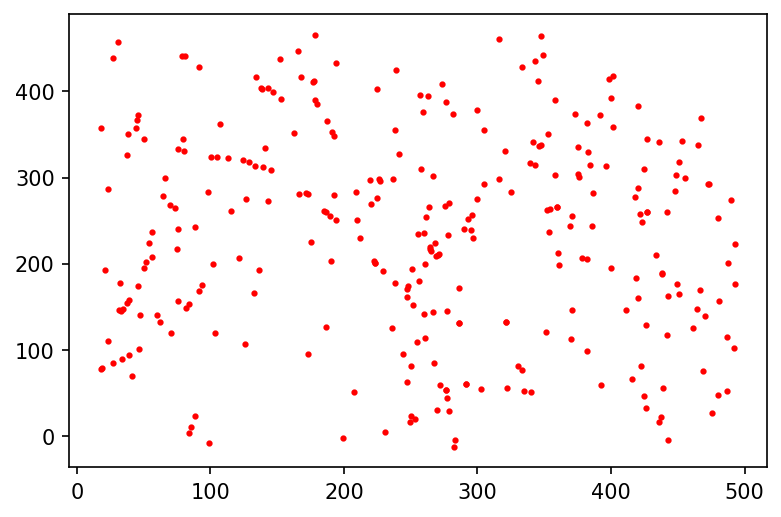

In [104]:
from matplotlib import pyplot as plt
for k, v in gt_json["0"].items():
    x = 512 * (1/2 +  v["x"]/16 * 1000)
    y = v["y"] * 1000, 
    z = - (478 - 512 * (v["z"]/16 * 1000 - 1/2))
    plt.plot(x, z, marker="o", markeredgecolor="red",markerfacecolor="red", markersize=2)
    
plt.show()

### Visualize Frames with ground truth

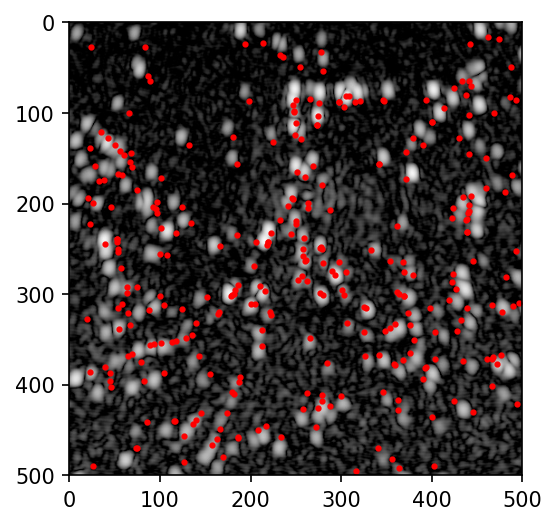

In [107]:
# https://stackoverflow.com/questions/43445103/inline-animations-in-jupyter
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, ax = plt.subplots()

x= np.linspace(0,500,500)
def animate(t):
    plt.cla()
    plt.imshow(plt.imread(f"../data/frames/frame{t}.jpg"))
    # The points need to be caliberated.  
    for k, v in gt_json[str(t)].items():
        # Caliberation 1
        x = 256+(v["x"] * 1000)*512/16
        y = v["y"] * 1000, 
        z = 256 - (30-v["z"]*1000)*512/16
        
        # Caliberation 2
#         x = 512 * (1/2 +  v["x"]/16 * 1000)
#         y = v["y"] * 1000, 
#         z = - (478 - 512 * (v["z"]/16 * 1000 - 1/2)) + 10
        plt.plot(x, z, marker="o", markeredgecolor="red",markerfacecolor="red", markersize=2)
    plt.plot(x+t,x)
    plt.xlim(0,500)
    plt.ylim(500,0)

matplotlib.animation.FuncAnimation(fig, animate, frames=20)

### Find image dimension

(512, 512, 3)


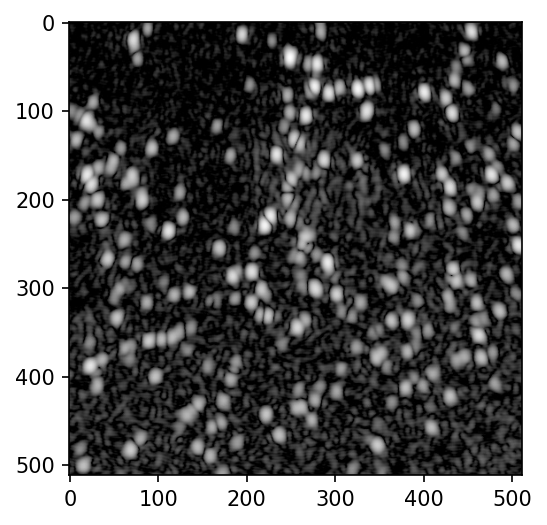

In [109]:
img = plt.imread(f"../data/frames/frame0.jpg")
plt.imshow(img);
print(img.shape)